## Trends in gun propensity in the US population from 2010 to 2016 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction


>
> 
The National Instant Criminal Background Check System (NICS) is a background check system in the United States created by the Brady Handgun Violence Prevention Act (Brady Law) of 1993 to prevent firearm sales to people prohibited under the Act. The system was launched by the Federal Bureau of Investigation (FBI) in 1998. Under the system, firearm dealers, manufacturers or importers who hold a Federal Firearms License (FFL) are required to undertake a NICS background check on prospective buyers before transferring a firearm. 
NICS determine whether a prospective buyer is eligible to buy firearms or explosives. The NICS mission is all about saving lives and protecting people from harm—by not letting firearms fall into the wrong hands.Ensures the timely transfer of firearms to eligible buyers.
Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data
from census.gov.The NICS is not a gun register, but is a list of persons prohibited from owning or possessing a firearm.

We choose gun permits from NICS as our dependent variable to explore some questions :

- What is the overall trend of gun permits in the US population from 1998?

- What happened with this trend of gun permits in the US population between 2010 and 2016

- Which states have had the highest growth in gun permits/licences? 

- What aspects in demographics are the most associated with high gun per household? 




We'll be importing the following data sciences packages to perform the analysis

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data
point per state (2016), but a few have data for more than one year.


In [196]:
gun_df = pd.read_excel('gun_data.xlsx')
census_df = pd.read_csv('us_census_data.csv')

In [197]:
#pd.set_option('display.float_format', lambda x: '%.5f' % x) # supress scientific notation

We can see a general inspection of the dataframe with records in a monthly basis

In [198]:
gun_df.head() # General visualization of the dataframe

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.00000,0.00000,5734.00000,6320.00000,221.00000,317,0.00000,15.00000,...,0.00000,0.00000,0.00000,9.00000,16.00000,3.00000,0.00000,0.00000,3.00000,32019
1,2017-09,Alaska,209.00000,2.00000,2320.00000,2930.00000,219.00000,160,0.00000,5.00000,...,0.00000,0.00000,0.00000,17.00000,24.00000,1.00000,0.00000,0.00000,0.00000,6303
2,2017-09,Arizona,5069.00000,382.00000,11063.00000,7946.00000,920.00000,631,0.00000,13.00000,...,0.00000,0.00000,0.00000,38.00000,12.00000,2.00000,0.00000,0.00000,0.00000,28394
3,2017-09,Arkansas,2935.00000,632.00000,4347.00000,6063.00000,165.00000,366,51.00000,12.00000,...,0.00000,0.00000,0.00000,13.00000,23.00000,0.00000,0.00000,2.00000,1.00000,17747
4,2017-09,California,57839.00000,0.00000,37165.00000,24581.00000,2984.00000,0,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,123506


Records and fields in the gun dataframe

In [199]:
gun_df.shape # Identify rows and columns

(12485, 27)

Identifying null values and data types

In [200]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [201]:
#gun_df.dtypes # Exploring data Types

Customize the dataframe removing extra characters the month label and droping columns to keep only date, state and permit

In [202]:
gun_df['month']= gun_df['month'].str[:4] # remove extra caracters in month name

In [203]:
#gun_df.head()

In [204]:
cols = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26] # Droping columns
gun_df.drop(gun_df.columns[cols],axis= 1, inplace = True)

In [205]:
gun_df.head()

,month,state,permit
0,2017,Alabama,16717.00000
1,2017,Alaska,209.00000
2,2017,Arizona,5069.00000
3,2017,Arkansas,2935.00000
4,2017,California,57839.00000


In [206]:
gun_df.shape # remaining rows and columns

(12485, 3)

Our analysis is going to be in a yearly basis we change the label two of three columns

In [207]:
gun_df.rename(columns={'month':'year'},inplace = True) # Rename column

In [208]:
gun_df.rename(columns={'permit_allow':'permit'}, inplace = True) # Rename column

In [209]:
gun_df.head()

,year,state,permit
0,2017,Alabama,16717.00000
1,2017,Alaska,209.00000
2,2017,Arizona,5069.00000
3,2017,Arkansas,2935.00000
4,2017,California,57839.00000


Is posible to see some null values in the permit columns

In [210]:
gun_df.info()# we can see null values in permit column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    12485 non-null  object 
 1   state   12485 non-null  object 
 2   permit  12461 non-null  float64
dtypes: float64(1), object(2)
memory usage: 292.7+ KB


# **Cleaning Gun_df**


We can identify nulls values in permit column and dtypes of all the fields

In [211]:
gun_df.info() # Exploring null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    12485 non-null  object 
 1   state   12485 non-null  object 
 2   permit  12461 non-null  float64
dtypes: float64(1), object(2)
memory usage: 292.7+ KB


In [212]:
gun_df.isnull().sum() # Identifing nulls values

year       0
state      0
permit    24
dtype: int64

Removal and check of null values from permit

In [213]:
gun_df.dropna(inplace=True) # removing null values

In [214]:
gun_df.isnull().sum()

year      0
state     0
permit    0
dtype: int64

In [215]:
gun_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12461 entries, 0 to 12484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    12461 non-null  object 
 1   state   12461 non-null  object 
 2   permit  12461 non-null  float64
dtypes: float64(1), object(2)
memory usage: 389.4+ KB


In [216]:
gun_df.groupby('permit')

In [217]:
gun_df.groupby('year')

In [218]:
gun_df.head()

,year,state,permit
0,2017,Alabama,16717.00000
1,2017,Alaska,209.00000
2,2017,Arizona,5069.00000
3,2017,Arkansas,2935.00000
4,2017,California,57839.00000


Identy, remove and check duplicates

In [219]:
print(gun_df.duplicated().sum())

4354


In [220]:
gun_df.drop_duplicates(inplace = True)

In [221]:
gun_df.duplicated().sum()

0

# **Cleaning census_df**

We are going to repeat the cleaning process with the second dataset of census_df.
Inspection of Census data.

In [222]:
census_df.head() #Exploring Census dataframe

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Records and fields in the data frame

In [223]:
census_df.shape #Column and rows

(85, 52)

Is possible to see great deal of null values in rows and all the data types is defined as object mainly string as we see in the data frame

In [224]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

The data is mainly strings

Drop and check of the first column 'Fact Note', and make the change permanent

In [225]:
cols = [1]
census_df.drop(census_df.columns[cols],axis= 1, inplace = True)

In [226]:
#census_df.head()

Identify, remove and check null values

In [227]:
census_df.isnull().sum()

Fact               5
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia          20
Washington   

In [228]:
gun_df.dropna(inplace = True)

In [229]:
gun_df.isnull().sum()

year      0
state     0
permit    0
dtype: int64

In [230]:
#census_df.info()

Identify, remove and check duplicates

In [231]:
census_df.duplicated().sum()

4

In [232]:
census_df.drop_duplicates(inplace = True)

In [233]:
census_df.duplicated().sum()

0

In [234]:
census_df.shape

(81, 51)

In [235]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 84
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 non-null     object
 18  Louisiana   

We are going to structure census_df dataframe in order to be merge to gun_df, so we transpose column and rows next, to treat census data as variables or atributes in columns of the states in this case records.
Remember that our dependent variable would be permits per state so we need to find those independent variables in the census data that better guide us to useful insight in the EDA analysis.

In [236]:
census_df = census_df.transpose()# Transposing state colums to rows

In [237]:
#census_df.info()

Drop empty columns in census dataframe

In [238]:
cols = [ 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80] # Droping empty colums
census_df.drop(census_df.columns[cols],axis= 1, inplace = True)

In [239]:
#census_df.head()

We are going to save until now this file

In [240]:

#census_df.to_csv('census_edited.csv')


In [241]:
census_df = pd.read_csv('census_edited.csv', header = 1)

In [242]:
#census_df.head()

Renaming columns

In [243]:
census_df.rename(columns = {'Fact': 'state'}, inplace = True)

In [244]:
census_df.head()

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


We are going back to merging the two datasets in order to find aswers to the last question of the EDA

<a id='eda'></a>
## Exploratory Data Analysis



### - What is the overall trend of gun permits in the US population since 1998?

At first glance since creation of NICS trend was going up consistenly but care must taken beacause probably registration in permits seems to be asymetric between states and years mainly in the fisrt couple of years of the implementation of program.
we have decided to go deeper in the analysis comparing the trend between years where census data provide useful information.
Comparison will be made in two dimensions, between 2010 and 2016 and within 2016 where state specific information seems to be more profound

We are going to start taking a look adding permits by state and by year and changing the data type to integers

In [245]:
gun_df.groupby('state').sum().astype(int) # change to int to remove decimal point with cero values


,permit
state,
Alabama,1046965
Alaska,12851
Arizona,709256
Arkansas,507845
California,6530543
Colorado,426185
Connecticut,1595270
Delaware,22720
District of Columbia,310


We are going to remove missing data records. We have two different categories here. Terrtories of the United States that they are not sovereign entities like
Guam, Mariana Islands or Puerto Rico (outside the scope of US gun law) and states with no records like New jersey, Rhode Island and Vermont.

In [246]:
gun_df = gun_df.query("permit >= 5")

In [247]:
gun_df.groupby('year').sum().astype(int)# changing data type of permit to integer


,permit
year,
1998,78153
1999,1035343
2000,1225952
2001,1407937
2002,1350969
2003,1400537
2004,1345038
2005,1343181
2006,2036568


Now we make our first graph to se the trend in gun permits

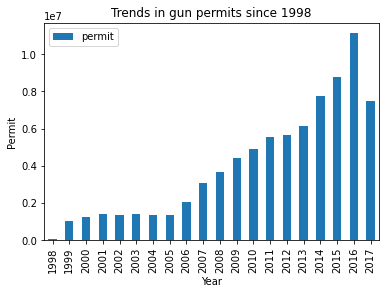

In [248]:
gun_df.groupby('year').sum().iloc[:20].plot(kind ='bar')
plt.title('Trends in gun permits since 1998')
plt.xlabel('Year')
plt.ylabel('Permit');

__At first glance since creation of NICS in 1998 trend was going up consistenly but care must taken beacause probably registration in permits seems to be asymetric between states and years mainly in the fisrt couple of years of the implementation of program.
We have decided to go deeper in the analysis comparing the trend between years where census data provide useful information.__


Comparison will be made in two dimensions, between 2010 and 2016 and within 2016 where state specific information seems to be more profound

We are going to filter information for 2010 first

In [249]:
gun_2010_df = gun_df.query('year == "2010"')# We start filtering data by year 2010

In [250]:
gun_2010_df = gun_2010_df.groupby('state').sum()# Filtering by year

In [251]:
gun_2010_df = gun_2010_df.query("permit >= 50") # Filtering by data availability

In [252]:
gun_2010_df.astype(int)

,permit
state,
Alabama,4621
Arizona,24751
Arkansas,31305
California,295252
Colorado,12928
Connecticut,90942
Georgia,95959
Hawaii,10527
Idaho,13758


Only 37 reliable records for 2010

In [253]:
gun_2010_df.shape # States with less biased pressumible information in 2010

(37, 1)

And next we are going to do teh same for 2016

In [254]:
gun_2016_df = gun_df.query('year == "2016"') # Repeating the same process for 2016

In [255]:
gun_2016_df = gun_2016_df.groupby('state').sum()

In [256]:
gun_2016_df = gun_2016_df.query("permit >= 50")

Renaming permit variable for 2010 as 'pe_2010' and keeping 'permit' for 2016.

In [257]:
gun_2010_df.rename(columns = lambda x:x[:2] + "_2010", inplace = True)# Rename of 2010 permit

In [258]:
gun_2010_df.dropna(inplace =True)

In [259]:
gun_2010_df.isnull().sum()

pe_2010    0
dtype: int64

We define a new variable 'permit_growth_by_state' as the differnce of permits between states 2016 vs 2010 

In [260]:
permit_growth_by_state = gun_2016_df['permit'] - gun_2010_df['pe_2010'] #difference of permits between statees 2016 vs 2010

We have 48 records in 2016 and 37 in 2010 so we drop null values derived before

In [263]:
permit_growth_by_state.dropna(inplace = True) # drop nulls derived from 37 vs 48 states values in 2010 vs 2016

We merge the two variable from 2010 and 2016

In [264]:
gun_comb_df = gun_2010_df.merge(gun_2016_df, left_on = 'state', right_on = 'state', how = 'right')# merging columns

In [265]:
gun_comb_df.dropna(inplace = True)

In [266]:
gun_comb_df.shape # we kept 37 states for the comparison between 2010 and 2016

(37, 2)

We kept 37 seven states for the comparison between years because we supossed, the lack of enough data in some states in 2010 probably not registered

# **Which states have had the highest growth in gun permits?**

We choose to work with 2016 dataset to asnwer this question because of lack of data in 2010 for many states . And comparing 2016 vs 2010 only in those state with enough data 

**Permits by state in 2016**

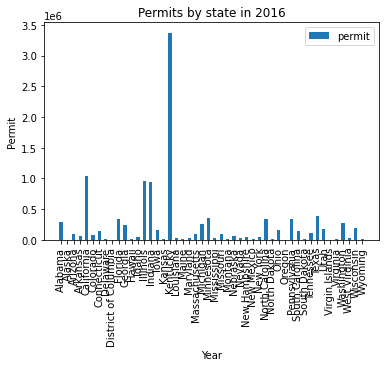

In [267]:
gun_2016_df1 = gun_2016_df.groupby('state').sum().iloc[:48].plot(kind ='bar')
plt.title('Permits by state in 2016')
plt.xlabel('Year')
plt.ylabel('Permit')
plt.autoscale(enable=True, axis='both', tight=None)


**Which are the top states with gun permits in 2016?**

In [268]:
gun_2016_top = gun_2016_df.query('permit >= 500000') # States with over 500000 permits in 2016

In [269]:
gun_2016_top

,permit
state,
California,1036981.00000
Illinois,962930.00000
Indiana,946912.00000
Kentucky,3372613.00000


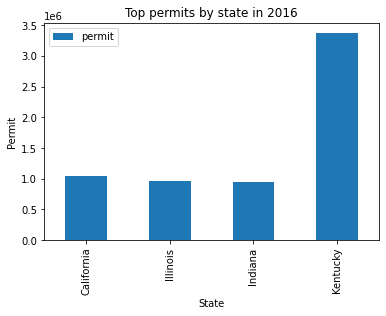

In [270]:
gun_2016_top.plot(kind = 'bar')
plt.title('Top permits by state in 2016')
plt.xlabel('State')
plt.ylabel('Permit');


**The Top States in descending order in 2016 permits were Kentucky, California, Illinois and Indiana**

**Which are the states with the larger difference between 2016 and 2010?**

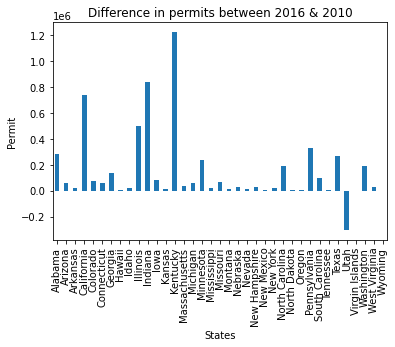

In [271]:
permit_growth_by_state.plot(kind ='bar')
plt.title('Difference in permits between 2016 & 2010')
plt.xlabel('States')
plt.ylabel('Permit');



**States with mayor growth in permits were the same but in different descending order Kentucky, Indiana, California, and Illinois**

# **What was the average growth in permits per state between 2016 and 2010 from those 37 states with enough data?**

We have to compare the mean between the two years 2010 and 2016

In [272]:
avg_2010 = gun_comb_df.pe_2010.mean()

In [273]:
avg_2016 = gun_comb_df.permit.mean()

Average difference of permits between 2016 to 2010

In [276]:
avg_2016 - avg_2010

146717.3783783784

**Comparison between distributions of permits between 2016 vs 2010**

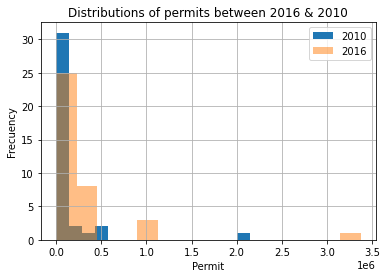

In [277]:
gun_comb_df.pe_2010.hist(alpha= 1,bins = 15, label = '2010')                        
gun_comb_df.permit.hist(alpha =0.5,bins = 15, label = '2016')
plt.title('Distributions of permits between 2016 & 2010')
plt.xlabel('Permit')
plt.ylabel('Frecuency')
plt.legend(loc='best');



**There was an absolute difference in over 140000 permits in the same states between 2016 and 2010. Distribution of the data in 2010 and 2016 are not perfectly normal, in both cases is skewed to the right.
Being skewness in 2016 larger than in 2010.**

# *What census data is most associated with high gun per household?*

We start merging the two datasets, and some extra cleaning and preparation of this new dataframe

We are  going to use gun_2016_df instead the combination of 2010 and 2016 named gun_comb_df 

In [278]:
gun_census_df = gun_2016_df.merge(census_df, left_on = 'state', right_on = 'state', how = 'right')

We are going to drop 2010 permits taking into consideration that the correlation with 2016 is strong at 0,94 and in order to perform the association analysis between permits and demographics with a more complete 2016 dataset

In [279]:
gun_census_df.head()

,state,permit,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,291039.00000,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,2867.00000,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,87771.00000,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,55456.00000,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,1036981.00000,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [280]:
#gun_census_df = gun_census_df.replace(',','', regex=True)

In [281]:
# gun_census_df = gun_census_df.replace(',','_', regex=True)

Replace commas in the variables names label by hyphens

In [282]:
gun_census_df.rename(columns = lambda x: x.strip().lower().replace(",", "_"), inplace=True)

In [283]:
gun_census_df.shape

(50, 67)

In [284]:
#gun_census_df.info()

Parcial Saving of the merged edited file

In [285]:
gun_census_df.to_csv('gun_census_edited', index = False)# Saving the merged the edited dataset

In [286]:
gun_census_df = pd.read_csv('gun_census_edited')
gun_census_df.head()    

,state,permit,population estimates_ july 1_ 2016_ (v2016),population estimates base_ april 1_ 2010_ (v2016),population_ percent change - april 1_ 2010 (estimates base) to july 1_ 2016_ (v2016),population_ census_ april 1_ 2010,persons under 5 years_ percent_ july 1_ 2016_ (v2016),persons under 5 years_ percent_ april 1_ 2010,persons under 18 years_ percent_ july 1_ 2016_ (v2016),persons under 18 years_ percent_ april 1_ 2010,...,all firms_ 2012,men-owned firms_ 2012,women-owned firms_ 2012,minority-owned firms_ 2012,nonminority-owned firms_ 2012,veteran-owned firms_ 2012,nonveteran-owned firms_ 2012,population per square mile_ 2010,land area in square miles_ 2010,fips code
0,Alabama,291039.00000,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,2867.00000,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,87771.00000,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,55456.00000,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,1036981.00000,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [287]:
gun_census_df.shape

(50, 67)

As we have seen before, permit column has 46 values so we must drop null values 

In [288]:
gun_census_df.dropna(inplace= True) 

Duplicates are not detected

In [289]:
print(gun_census_df.duplicated().sum())

0


Data type inspection

In [290]:
#gun_census_df.info()

Vast mayority of the records are strings so we must transform them into numeric values

In [291]:
# iloc: for index based access
cols = [i for i in range(len(gun_census_df.columns))]
gun_census_df.iloc[2:, cols].apply(pd.to_numeric, errors = 'ignore')


,state,permit,population estimates_ july 1_ 2016_ (v2016),population estimates base_ april 1_ 2010_ (v2016),population_ percent change - april 1_ 2010 (estimates base) to july 1_ 2016_ (v2016),population_ census_ april 1_ 2010,persons under 5 years_ percent_ july 1_ 2016_ (v2016),persons under 5 years_ percent_ april 1_ 2010,persons under 18 years_ percent_ july 1_ 2016_ (v2016),persons under 18 years_ percent_ april 1_ 2010,...,all firms_ 2012,men-owned firms_ 2012,women-owned firms_ 2012,minority-owned firms_ 2012,nonminority-owned firms_ 2012,veteran-owned firms_ 2012,nonveteran-owned firms_ 2012,population per square mile_ 2010,land area in square miles_ 2010,fips code
2,Arizona,87771.00000,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.30000,"113,594.08","""04"""
3,Arkansas,55456.00000,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56.00000,"52,035.48","""05"""
4,California,1036981.00000,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.10000,"155,779.22","""06"""
5,Colorado,85087.00000,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.50000,"103,641.89","""08"""
6,Connecticut,148949.00000,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.10000,"4,842.36","""09"""
7,Delaware,8440.00000,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.80000,"1,948.54","""10"""
8,Florida,337086.00000,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.60000,"53,624.76","""12"""
9,Georgia,233115.00000,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.40000,"57,513.49","""13"""
10,Hawaii,16627.00000,"1,428,557","1,360,301",5.00%,"1,360,301",6.40%,6.40%,21.60%,22.30%,...,"118,454","60,409","44,453","74,208","38,510","11,148","101,334",211.80000,"6,422.63","""15"""
11,Idaho,38086.00000,"1,683,140","1,567,650",7.40%,"1,567,582",6.80%,7.80%,26.00%,27.40%,...,"146,642","70,438","45,121","10,592","130,973","12,804","124,314",19.00000,"82,643.12","""16"""


In [292]:
#gun_census_df.info()

Transformation of strings is not posible by two reason,in some columns we have caracters mainly values containing commas, and the % sign in others columns 

In [293]:
gun_census_df = gun_census_df.replace(',','', regex=True)# eliminate commas in the numeric values in the fdata frame

Transform to numeric the population estimate 2016

Rename the column

In [294]:
gun_census_df = gun_census_df.rename(columns = {'population estimates_ july 1_ 2016_  (v2016)' : 'population_2016'})    

In [295]:
gun_census_df.head(46)

,state,permit,population_2016,population estimates base_ april 1_ 2010_ (v2016),population_ percent change - april 1_ 2010 (estimates base) to july 1_ 2016_ (v2016),population_ census_ april 1_ 2010,persons under 5 years_ percent_ july 1_ 2016_ (v2016),persons under 5 years_ percent_ april 1_ 2010,persons under 18 years_ percent_ july 1_ 2016_ (v2016),persons under 18 years_ percent_ april 1_ 2010,...,all firms_ 2012,men-owned firms_ 2012,women-owned firms_ 2012,minority-owned firms_ 2012,nonminority-owned firms_ 2012,veteran-owned firms_ 2012,nonveteran-owned firms_ 2012,population per square mile_ 2010,land area in square miles_ 2010,fips code
0,Alabama,291039.00000,4863300,4780131,1.70%,4779736,6.00%,6.40%,22.60%,23.70%,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
1,Alaska,2867.00000,741894,710249,4.50%,710231,7.30%,7.60%,25.20%,26.40%,...,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,"""02"""
2,Arizona,87771.00000,6931071,6392301,8.40%,6392017,6.30%,7.10%,23.50%,25.50%,...,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08,"""04"""
3,Arkansas,55456.00000,2988248,2916025,2.50%,2915918,6.40%,6.80%,23.60%,24.40%,...,231959,123158,75962,35982,189029,25915,192988,56,52035.48,"""05"""
4,California,1036981.00000,39250017,37254522,5.40%,37253956,6.30%,6.80%,23.20%,25.00%,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22,"""06"""
5,Colorado,85087.00000,5540545,5029324,10.20%,5029196,6.10%,6.80%,22.80%,24.40%,...,547352,284554,194508,85849,442365,51722,469524,48.5,103641.89,"""08"""
6,Connecticut,148949.00000,3576452,3574114,0.10%,3574097,5.20%,5.70%,21.10%,22.90%,...,326693,187845,106678,56113,259614,31056,281182,738.1,4842.36,"""09"""
7,Delaware,8440.00000,952065,897936,6.00%,897934,5.80%,6.20%,21.50%,22.90%,...,73418,38328,23964,14440,54782,7206,60318,460.8,1948.54,"""10"""
8,Florida,337086.00000,20612439,18804592,9.60%,18801310,5.50%,5.70%,20.10%,21.30%,...,2100187,1084885,807817,926112,1121749,185756,1846686,350.6,53624.76,"""12"""
9,Georgia,233115.00000,10310371,9688680,6.40%,9687653,6.40%,7.10%,24.40%,25.70%,...,929864,480578,376506,371588,538893,96787,800585,168.4,57513.49,"""13"""


Change data type of population_2016

In [296]:
gun_census_df['population_2016'] = pd.to_numeric(gun_census_df['population_2016'])

In [297]:
gun_census_df.dtypes


state                                                                                     object
permit                                                                                   float64
population_2016                                                                            int64
population estimates base_ april 1_ 2010_  (v2016)                                        object
population_ percent change - april 1_ 2010 (estimates base) to july 1_ 2016_  (v2016)     object
                                                                                          ...   
veteran-owned firms_ 2012                                                                 object
nonveteran-owned firms_ 2012                                                              object
population per square mile_ 2010                                                          object
land area in square miles_ 2010                                                           object
fips code                     

In [298]:
gun_census_df['permit'].describe()

count        46.00000
mean     241980.60870
std      531401.44682
min        2867.00000
25%       21025.00000
50%       86429.00000
75%      246650.25000
max     3372613.00000
Name: permit, dtype: float64

We consider Kentucky with a maximun value in permits an outlier, so we decided to drop the record 16

In [299]:
gun_census_df.drop(gun_census_df.index[[16]], inplace=True)# drop Kentucky as outlier

**Relationship between population_2016 and permit by state**

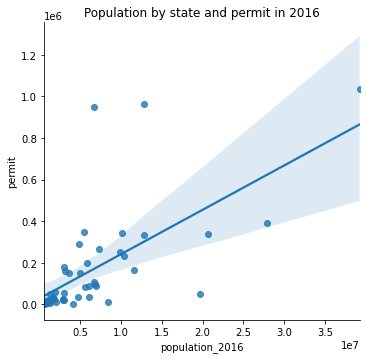

In [300]:
sns.lmplot(x='population_2016', y= 'permit', data = gun_census_df,fit_reg=True); 
plt.title('Population by state and permit in 2016');

It´s possible to see linear correlation between population and permits

**Defining new variables for analysis**

We are transforming percentages to float first, and defining new variables in demographics with absolute numbers per state.
The idea is to define new independent variables with absolute values by states and explore aspects of age, race and education in the census data that guide us to useful observations about the behaviour and propensity  of the Us population in relatinship to guns 
So the new variables to explore were defined as 'under_5', 'under_18', 'over_65', 'white_alone', 'high_school_high' and 'veterans'

In [301]:
gun_census_df['persons under 5 years_ percent_ july 1_ 2016_  (v2016)'] = gun_census_df['persons under 5 years_ percent_ july 1_ 2016_  (v2016)'].str.rstrip('%').astype('float') / 100.0

In [302]:
gun_census_df['persons under 18 years_ percent_ july 1_ 2016_  (v2016)'] = gun_census_df['persons under 18 years_ percent_ july 1_ 2016_  (v2016)'].str.rstrip('%').astype('float') / 100.0

In [303]:
gun_census_df['persons 65 years and over_ percent_  july 1_ 2016_  (v2016)'] = gun_census_df['persons 65 years and over_ percent_  july 1_ 2016_  (v2016)'].str.rstrip('%').astype('float') / 100.0

In [304]:
gun_census_df['white alone_ not hispanic or latino_ percent_ july 1_ 2016_  (v2016)'] = gun_census_df['white alone_ not hispanic or latino_ percent_ july 1_ 2016_  (v2016)'].str.rstrip('%').astype('float') / 100.0                     

In [305]:
gun_census_df['white alone_ percent_ july 1_ 2016_  (v2016)'] = gun_census_df['white alone_ percent_ july 1_ 2016_  (v2016)'].str.rstrip('%').astype('float') / 100.0      

In [306]:
gun_census_df["high school graduate or higher_ percent of persons age 25 years+_ 2011-2015"] = gun_census_df["high school graduate or higher_ percent of persons age 25 years+_ 2011-2015"].str.rstrip('%').astype('float') / 100.0                    

In [307]:
gun_census_df["bachelor's degree or higher_ percent of persons age 25 years+_ 2011-2015"] = gun_census_df["bachelor's degree or higher_ percent of persons age 25 years+_ 2011-2015"].str.rstrip('%').astype('float') / 100.0                    

In [308]:
gun_census_df['under_5'] = gun_census_df['population_2016'] * gun_census_df['persons under 5 years_ percent_ july 1_ 2016_  (v2016)']

In [309]:
gun_census_df['under_18'] = gun_census_df['population_2016'] * gun_census_df['persons under 18 years_ percent_ july 1_ 2016_  (v2016)']

In [310]:
gun_census_df['over_65'] = gun_census_df['population_2016'] * gun_census_df['persons 65 years and over_ percent_  july 1_ 2016_  (v2016)']

In [311]:
gun_census_df["white_alone"] = gun_census_df['population_2016'] * gun_census_df['white alone_ percent_ july 1_ 2016_  (v2016)']

In [312]:
gun_census_df["high_school_high"] = gun_census_df['population_2016'] * gun_census_df['high school graduate or higher_ percent of persons age 25 years+_ 2011-2015']

We are going to work with the variable permits per household instead of per capita because is larger number and we think is more user friendly for interpretation and visualization 

In [313]:
gun_census_df['households_ 2011-2015'] = pd.to_numeric(gun_census_df['households_ 2011-2015'])

In [314]:
gun_census_df["permit_household"]= gun_census_df['permit'] / gun_census_df['households_ 2011-2015']

In [315]:
gun_census_df['permit_household'].describe()

count   45.00000
mean     0.06717
std      0.06776
min      0.00189
25%      0.02809
50%      0.04419
75%      0.08233
max      0.37847
Name: permit_household, dtype: float64

**Distributions of permit, population and the new variables**

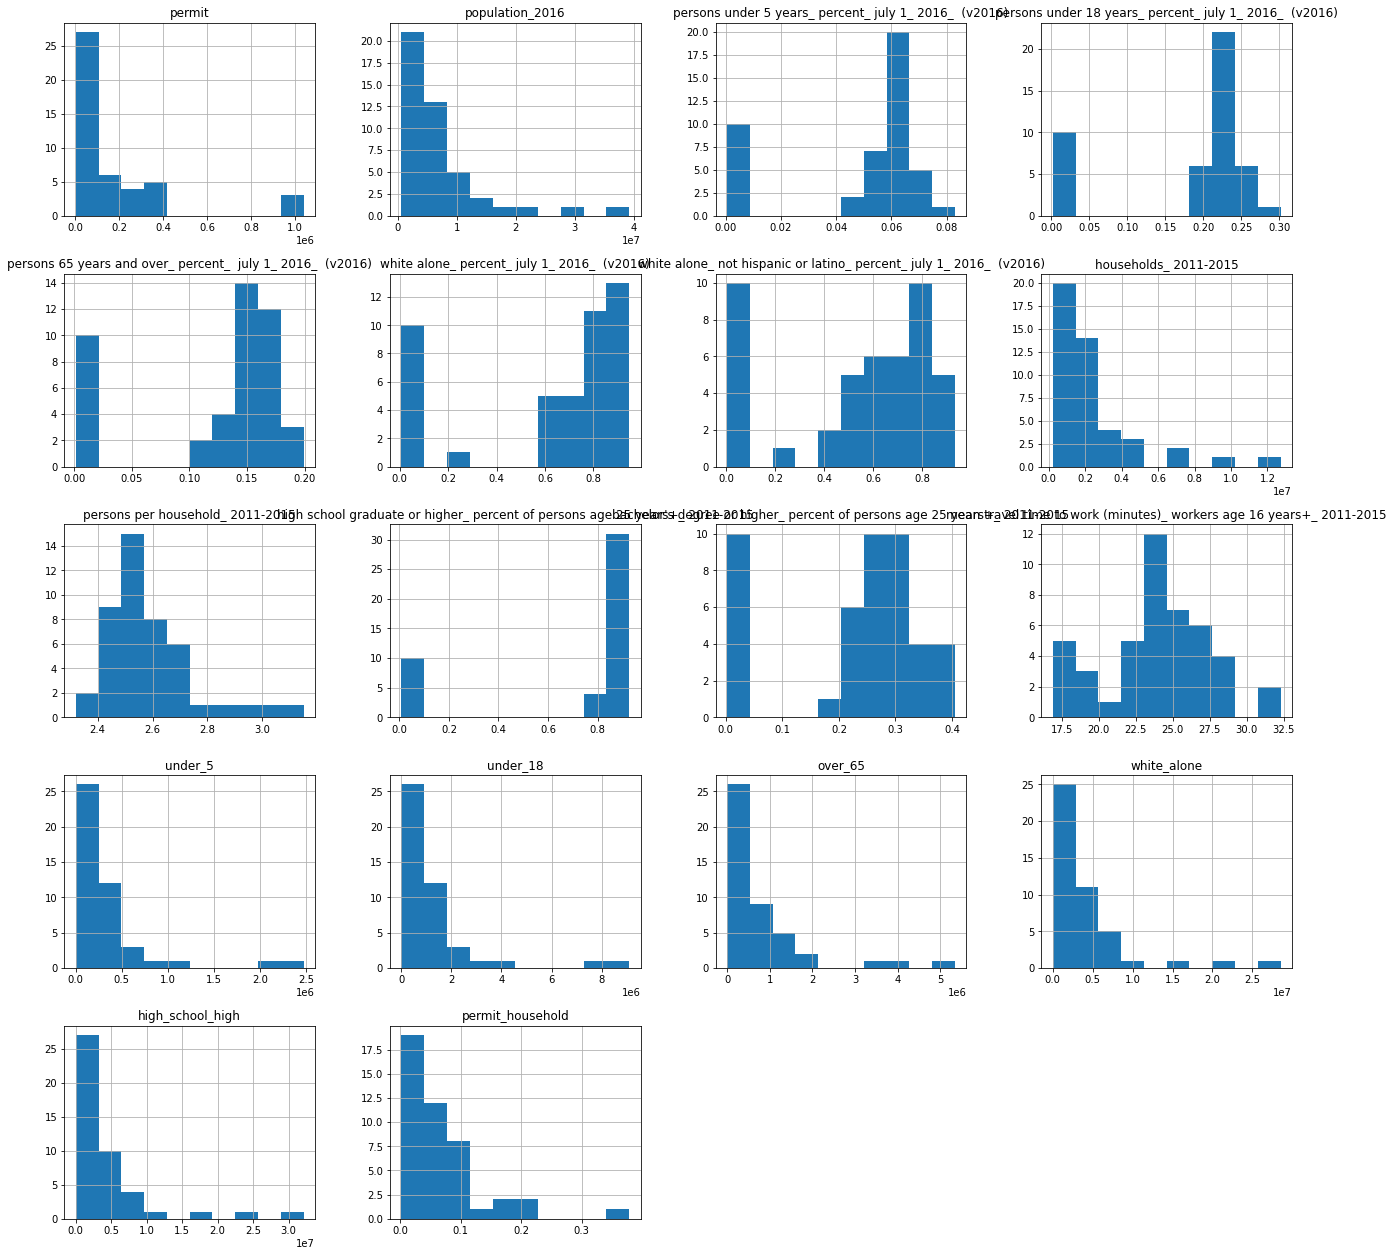

In [316]:
gun_census_df.hist(figsize =(22,22));

**Histograms of the newly defined variables resembles permits distributions, so we are going to explore, more realiable associations**

In [317]:
gun_census_df['permit_household'].median()

0.044186651893284565

In [318]:
gun_census_df['permit_household'].mean()

0.06716520070554355

we are going to choose median as a criterion of clasification to transform a continous variable into categorical

# *Classification of the US population between high and low gun propensity*

Taking into consideration low correlation of demographics with permits we are going to clasify the population in upper an lower 50% percentile using the median and not the mean due to the lack of normality of the distribution and defining this two new variables as high and low gun propensity in order two further explore the dataset  

In [319]:
#gun_census_df.style.set_precision(2)

**High and low gun propensity classification**

In [320]:
low_propensity= gun_census_df.query('permit_household < permit_household.median()')

In [321]:
high_propensity = gun_census_df.query('permit_household > permit_household.median()')

In [322]:
low_propensity.describe()

,permit,population_2016,persons under 5 years_ percent_ july 1_ 2016_ (v2016),persons under 18 years_ percent_ july 1_ 2016_ (v2016),persons 65 years and over_ percent_ july 1_ 2016_ (v2016),white alone_ percent_ july 1_ 2016_ (v2016),white alone_ not hispanic or latino_ percent_ july 1_ 2016_ (v2016),households_ 2011-2015,persons per household_ 2011-2015,high school graduate or higher_ percent of persons age 25 years+_ 2011-2015,bachelor's degree or higher_ percent of persons age 25 years+_ 2011-2015,mean travel time to work (minutes)_ workers age 16 years+_ 2011-2015,under_5,under_18,over_65,white_alone,high_school_high,permit_household
count,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000
mean,59691.54545,6010950.86364,0.04809,0.17651,0.11905,0.57996,0.49761,2177259.27273,2.60818,0.68193,0.22560,24.67273,259182.11458,952888.45316,576000.97231,3076532.64573,3460391.57273,0.02577
std,85713.90743,6538011.94727,0.02690,0.09806,0.06809,0.35115,0.31555,2249076.47801,0.15121,0.37490,0.13503,3.60558,422663.93203,1540227.95847,741117.83289,4735707.34972,4928774.60407,0.01340
min,2867.00000,585501.00000,0.00058,0.00212,0.00154,0.00699,0.00381,226865.00000,2.34000,0.00842,0.00249,18.30000,1290.22930,4911.19540,3433.67475,17189.18390,17522.14630,0.00189
25%,10900.00000,1893580.25000,0.05000,0.19375,0.10800,0.34175,0.27225,746568.25000,2.51500,0.82000,0.19575,23.20000,42082.73925,150812.12475,79824.01950,399023.76300,576134.16075,0.01683
50%,27685.00000,4387565.50000,0.06100,0.22300,0.14800,0.70050,0.57950,1630674.50000,2.61000,0.87150,0.27300,24.65000,142967.13200,525794.62500,390170.26300,1743112.99500,2008079.09900,0.02631
75%,87100.00000,6771632.75000,0.06375,0.23650,0.16025,0.83275,0.71900,2481470.00000,2.67000,0.90100,0.30600,25.60000,355261.52650,1326574.16100,844409.20400,4527920.92400,5290346.29225,0.03681
max,390462.00000,27862596.00000,0.07300,0.26200,0.19400,0.94800,0.93500,9149196.00000,3.02000,0.92300,0.40500,32.30000,2006106.91200,7300000.15200,3343511.52000,22122901.22400,22819466.12400,0.04268


In [323]:
high_propensity.describe()

,permit,population_2016,persons under 5 years_ percent_ july 1_ 2016_ (v2016),persons under 18 years_ percent_ july 1_ 2016_ (v2016),persons 65 years and over_ percent_ july 1_ 2016_ (v2016),white alone_ percent_ july 1_ 2016_ (v2016),white alone_ not hispanic or latino_ percent_ july 1_ 2016_ (v2016),households_ 2011-2015,persons per household_ 2011-2015,high school graduate or higher_ percent of persons age 25 years+_ 2011-2015,bachelor's degree or higher_ percent of persons age 25 years+_ 2011-2015,mean travel time to work (minutes)_ workers age 16 years+_ 2011-2015,under_5,under_18,over_65,white_alone,high_school_high,permit_household
count,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000,22.00000
mean,292365.50000,7748247.63636,0.05088,0.19014,0.12689,0.67567,0.59458,2792386.27273,2.58182,0.72896,0.23904,23.42727,394968.20889,1470378.01550,989928.89725,4991778.45984,5587744.11743,0.10961
std,301825.94568,8563464.84259,0.02517,0.09309,0.06298,0.33197,0.30910,2841763.91656,0.17641,0.34864,0.12026,3.39484,545369.09157,2010958.25043,1330004.04693,6490528.26318,7355986.61399,0.07572
min,16279.00000,865454.00000,0.00056,0.00209,0.00155,0.00685,0.00635,330858.00000,2.41000,0.00856,0.00258,16.90000,614.47234,2129.01684,1384.72640,7373.66808,7866.97686,0.04617
25%,81026.75000,3003990.25000,0.05275,0.20350,0.13225,0.70150,0.53775,964225.25000,2.47500,0.84425,0.23650,21.60000,76666.00000,304617.86875,233724.89750,1331620.68750,1300614.41375,0.06526
50%,216273.00000,5240535.50000,0.06000,0.22500,0.15050,0.79800,0.71200,1986535.00000,2.54500,0.88700,0.27550,23.90000,226935.68150,838049.45300,544949.21200,2873864.85700,3041737.22150,0.08453
75%,336253.25000,10092166.00000,0.06400,0.23525,0.16175,0.88550,0.80350,3725276.25000,2.61500,0.90925,0.31325,26.30000,445020.84800,1619050.65350,1056049.22425,5792273.34200,6397219.13350,0.12570
max,1036981.00000,39250017.00000,0.08300,0.30200,0.19900,0.93800,0.90800,12717801.00000,3.15000,0.92800,0.37600,28.40000,2472751.07100,9106003.94400,5338002.31200,28534762.35900,32106513.90600,0.37847


In [324]:
diff_propensity = high_propensity.mean() - low_propensity.mean()

In [325]:
#diff_propensity

**Population over_65 and permits, relationship, absolute and relative difference**

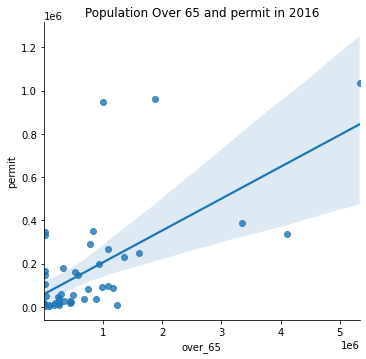

In [326]:
sns.lmplot(x='over_65',y= 'permit', data = gun_census_df,fit_reg=True);
plt.title('Population Over 65 and permit in 2016');

In [327]:
low_over_65= low_propensity ['over_65'].mean()

In [328]:
high_over_65 = high_propensity ['over_65'].mean()

In [329]:
over_65_diff = high_over_65 - low_over_65

In [330]:
over_65_diff

413927.92493909085

We are going to define a function to use this block of code in multiple bar charts next.

In [331]:
def make_bar(height1, height2, title, xlabel, ylabel):
    locations = [1, 2]
    heights = [height1 , height2]
    labels = ['Low', 'High']
    plt.bar(locations, heights, tick_label = labels)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    plt.show()   
  

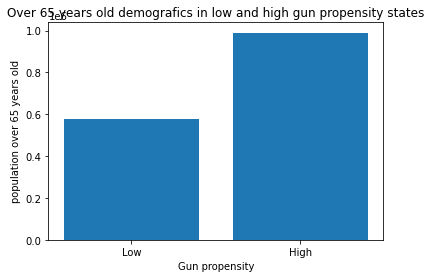

In [332]:
make_bar(height1 = low_over_65, height2 = high_over_65, title = 'Over 65 years old demografics in low and high gun propensity states', xlabel = 'Gun propensity', ylabel = 'population over 65 years old')

In [333]:
pop_low_propensity = low_propensity ['population_2016'].mean() 

In [334]:
pop_high_propensity = high_propensity ['population_2016'].mean() 

In [335]:
prop_over_65_low =low_over_65 / pop_low_propensity

In [336]:
prop_over_65_high = high_over_65 / pop_high_propensity

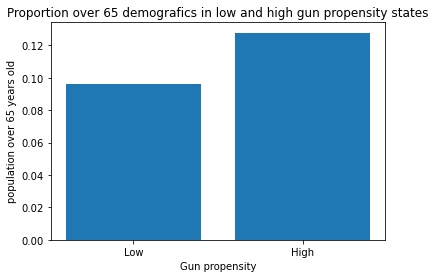

In [337]:
make_bar(height1 = prop_over_65_low, height2 = prop_over_65_high, title = 'Proportion over 65 demografics in low and high gun propensity states', xlabel = 'Gun propensity', ylabel = 'population over 65 years old')

**There is linear relationship between over_65 and permits and relative difference between high and low propensity populations seem to be relevant**

**Population white_alone and permits,relationship, absolute and relative difference**

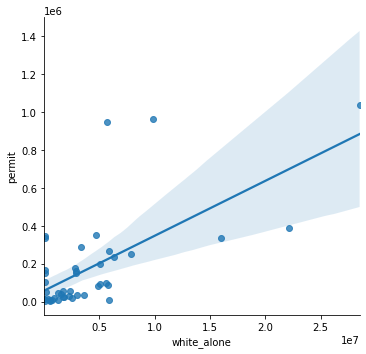

In [338]:
sns.lmplot(x='white_alone',y= 'permit', data = gun_census_df,fit_reg=True); 

In [339]:
low_white_alone = low_propensity ['white_alone'].mean()

In [340]:
high_white_alone = high_propensity ['white_alone'].mean()

In [341]:
white_alone_diff = high_white_alone - low_white_alone

In [342]:
white_alone_diff

1915245.8141077277

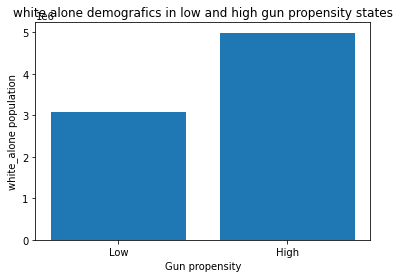

In [343]:
make_bar(height1 = low_white_alone, height2 = high_white_alone, title = 'white alone demografics in low and high gun propensity states', xlabel = 'Gun propensity', ylabel = 'white_alone population')

In [344]:
prop_white_alone_low = low_white_alone / pop_low_propensity

In [345]:
prop_white_alone_high= high_white_alone / pop_low_propensity

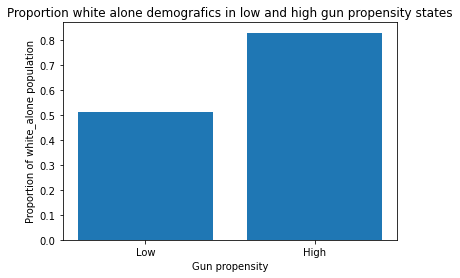

In [346]:
make_bar(height1 = prop_white_alone_low , height2 = prop_white_alone_high , title = 'Proportion white alone demografics in low and high gun propensity states', xlabel = 'Gun propensity', ylabel = 'Proportion of white_alone population')

**There is linear relationship between white_alone and permits and relative difference between high and low propensity states seem to be relevant**

**Population of high school graduates or higher and permits, relationship and relative difference**

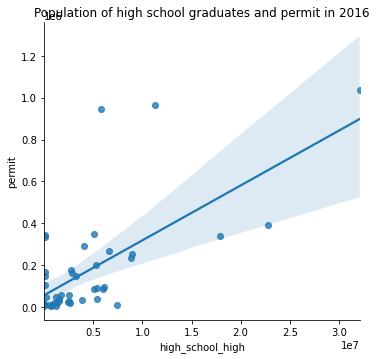

In [347]:
sns.lmplot(x='high_school_high',y= 'permit', data = gun_census_df,fit_reg=True)
plt.title('Population of high school graduates and permit in 2016'); 

In [348]:
low_school_high = low_propensity ['high_school_high'].mean()

In [349]:
high_school_high = high_propensity ['high_school_high'].mean()

In [350]:
prop_high_school_low = low_school_high / pop_low_propensity

In [351]:
prop_high_school_high = high_school_high/ pop_high_propensity 

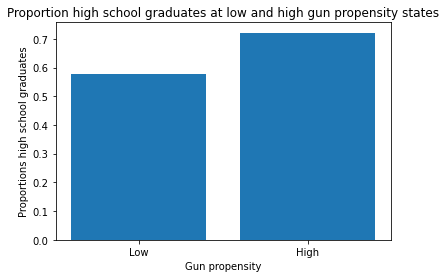

In [352]:
make_bar(height1 = prop_high_school_low, height2 = prop_high_school_high, title = 'Proportion high school graduates at low and high gun propensity states', xlabel = 'Gun propensity', ylabel = 'Proportions high school graduates')
    

**There is linear relationship between high school graduates and permits and relative difference between high and low propensity states seem to be relevant**

**Association Analysis Correlation Matrix**

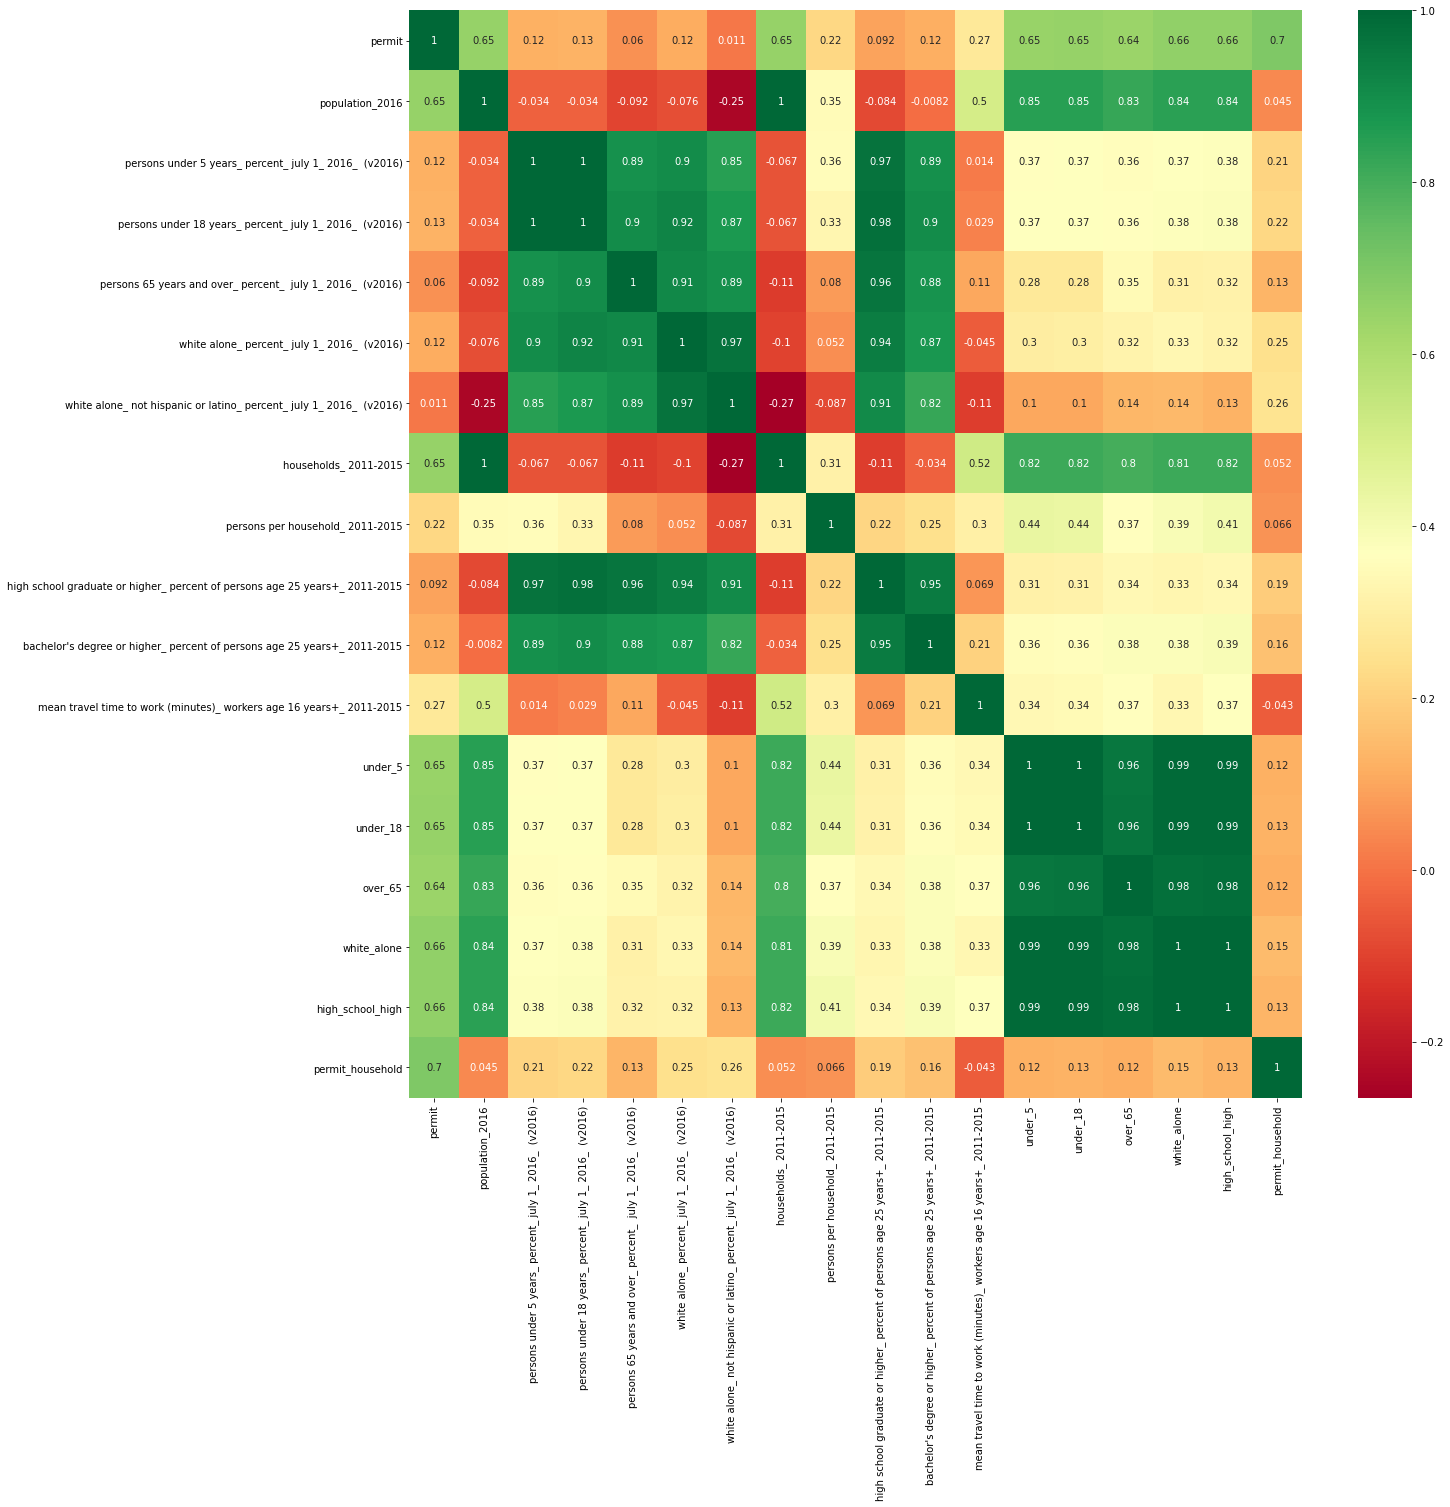

In [353]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(gun_census_df.corr(),annot=True,cmap='RdYlGn');

**Correlations shown in the matrix for the same studied variable seems moderately high. Multicolinearity probably should be taken into account if we go deeper in some type of statistical analysis**

<a id='conclusions'></a>
## Conclusions
Gun permits has been rising consistently in the US since FBI launched the National Instant Criminal Background Check System (NICS) in 1998.

Top four states in permits in 2016 in descending order were Kentucky, California, Illinois and Indiana.
States with mayor growth in permits between 2010 and 2016 were the same but in different order Kentucky, Indiana, California, and Illinois

In relationship with demographics. We have identified at least three variables that we should be considering at this point as good candidates to deeper statistical anaysis.
We have no evidence at this point to reject the hypothesis that population over 65 years old, white alone households and high school graduates as a level of education are not related with higher gun propensity within Us population. 
Finding statistical significance or multiple regression models could be useful in gaining confidence about this findings.
Further investigation must be required  

 <a id='conclusions'></a>
                                                                                                        **Atilio Ciuffolini** 